<a href="https://colab.research.google.com/github/viji514/coderscave_2/blob/main/climate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/climate analysis/daily_data.csv'
data = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the dataset to understand its structure
print(data.head())

       STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735  2015-01-01T23:59:00       SOD         6         PRECIP   
1  72518014735  2015-01-02T23:59:00       SOD         6         PRECIP   
2  72518014735  2015-01-03T23:59:00       SOD         6         PRECIP   
3  72518014735  2015-01-04T23:59:00       SOD         6         PRECIP   
4  72518014735  2015-01-05T23:59:00       SOD         6         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...                   190.0            

In [5]:
# Basic data information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   STATION                                     2668 non-null   int64  
 1   DATE                                        2668 non-null   object 
 2   REPORT_TYPE                                 2668 non-null   object 
 3   SOURCE                                      2668 non-null   int64  
 4   BackupElements                              2668 non-null   object 
 5   BackupElevation                             2668 non-null   int64  
 6   BackupEquipment                             2668 non-null   object 
 7   BackupLatitude                              2668 non-null   float64
 8   BackupLongitude                             2668 non-null   float64
 9   BackupName                                  2668 non-null   object 
 10  DailyAverage

In [6]:
# Convert the 'DATE' column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

In [7]:
# Extract year and month from the 'DATE' column
data['Year'] = data['DATE'].dt.year
data['Month'] = data['DATE'].dt.month

In [8]:
# Summary statistics
print(data.describe())

            STATION                           DATE  SOURCE  BackupElevation  \
count  2.668000e+03                           2668  2668.0           2668.0   
mean   7.251801e+10  2018-10-01 14:07:27.346326784     6.0            260.0   
min    7.251801e+10            2015-01-01 23:59:00     6.0            260.0   
25%    7.251801e+10            2016-11-29 17:59:00     6.0            260.0   
50%    7.251801e+10            2018-10-02 11:59:00     6.0            260.0   
75%    7.251801e+10            2020-08-03 05:59:00     6.0            260.0   
max    7.251801e+10            2022-05-31 23:59:00     6.0            260.0   
std    0.000000e+00                            NaN     0.0              0.0   

       BackupLatitude  BackupLongitude  DailyAverageDewPointTemperature  \
count     2668.000000      2668.000000                      2668.000000   
mean        42.689750       -73.828268                        38.217766   
min         42.681200       -73.831090                       -1

In [13]:
import seaborn as sns

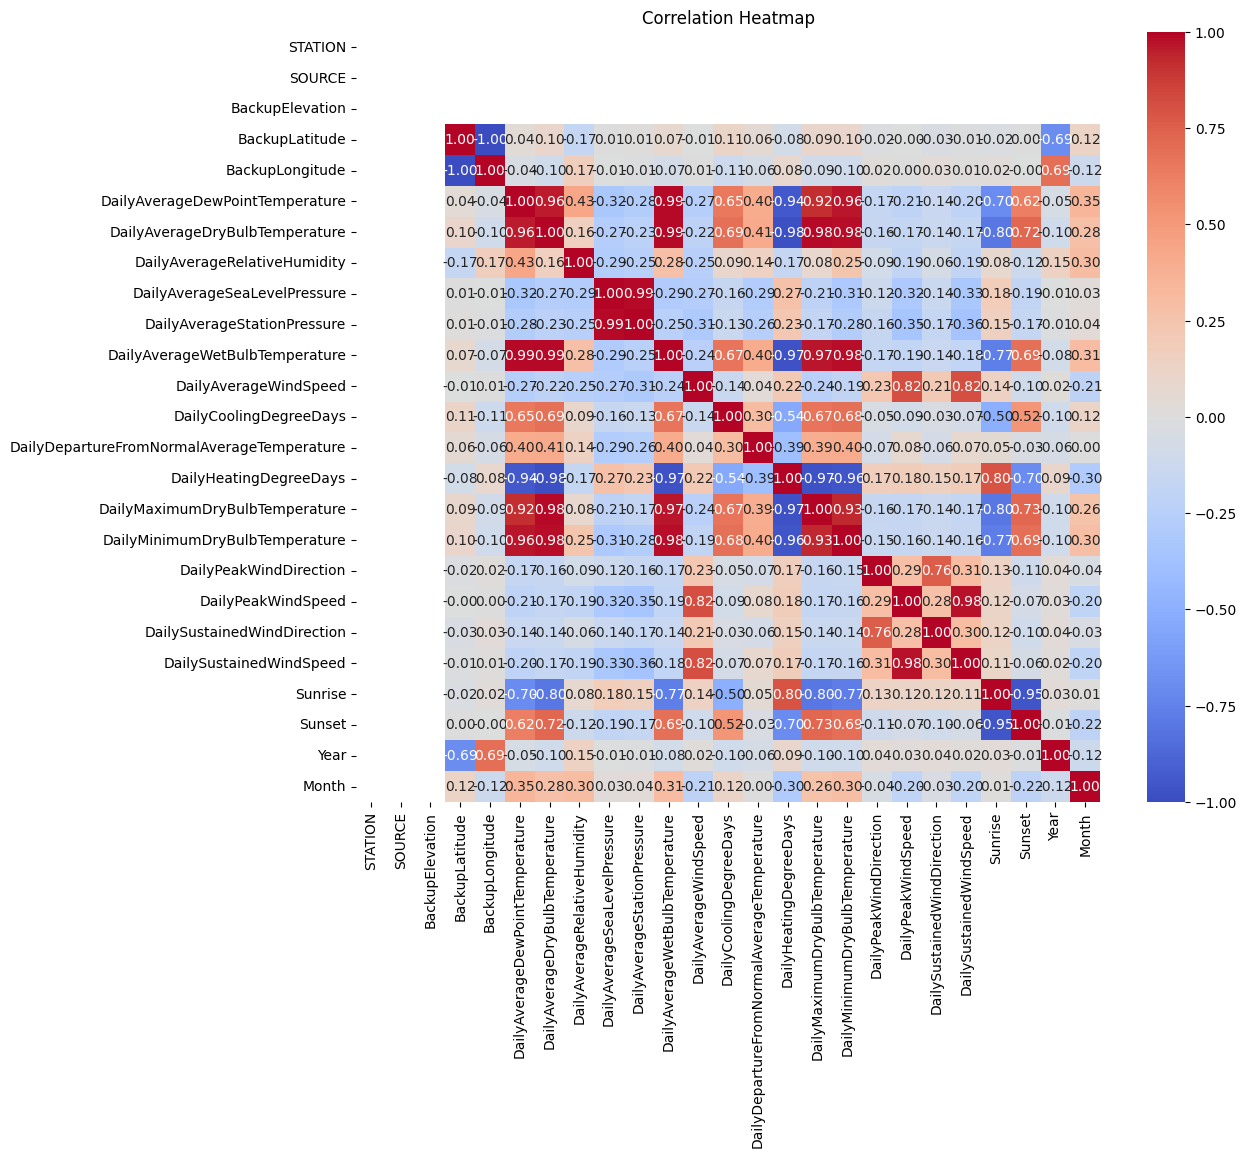

In [16]:
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Rotate the y-axis labels for better readability
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()

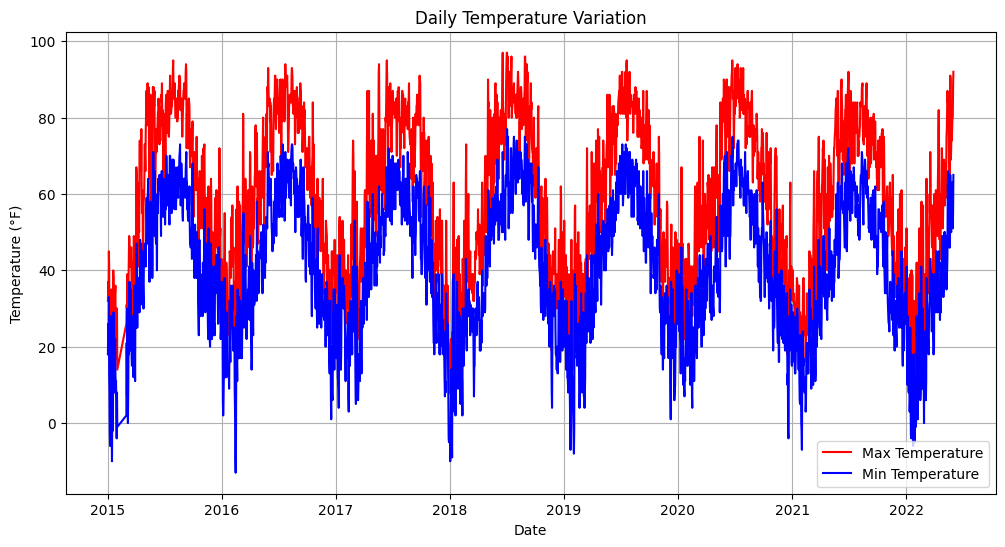

In [17]:
# Daily Temperature Variation
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['DailyMaximumDryBulbTemperature'], label='Max Temperature', color='red')
plt.plot(data['DATE'], data['DailyMinimumDryBulbTemperature'], label='Min Temperature', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Daily Temperature Variation')
plt.legend()
plt.grid(True)
plt.show()

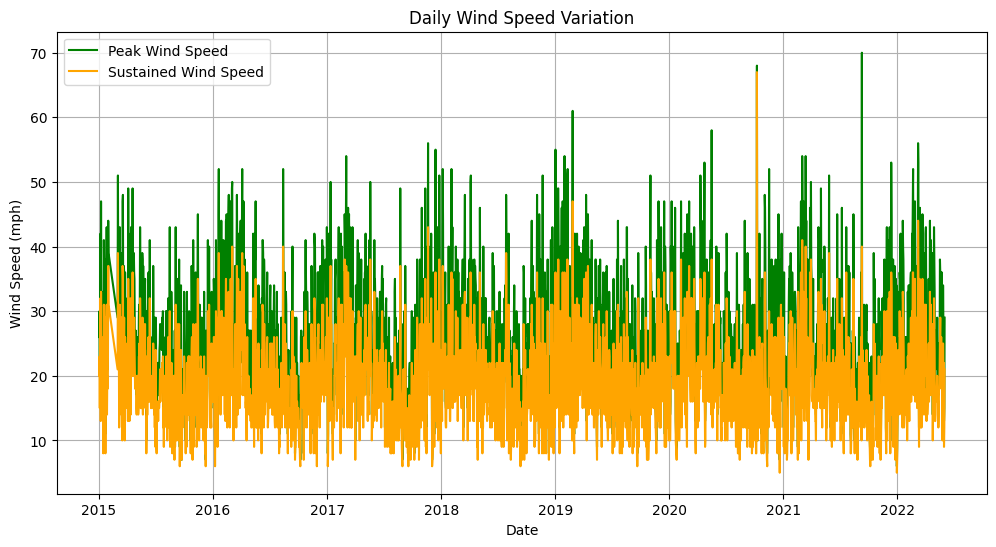

In [18]:
# Daily Wind Speed Variation
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['DailyPeakWindSpeed'], label='Peak Wind Speed', color='green')
plt.plot(data['DATE'], data['DailySustainedWindSpeed'], label='Sustained Wind Speed', color='orange')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.title('Daily Wind Speed Variation')
plt.legend()
plt.grid(True)
plt.show()

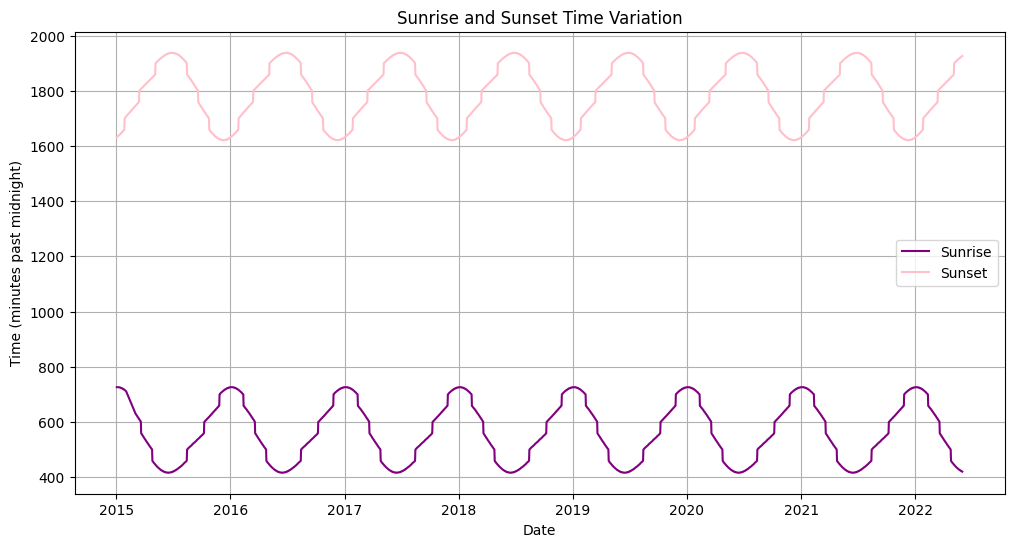

In [19]:
# Sunrise and Sunset Time Variation
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['Sunrise'], label='Sunrise', color='purple')
plt.plot(data['DATE'], data['Sunset'], label='Sunset', color='pink')
plt.xlabel('Date')
plt.ylabel('Time (minutes past midnight)')
plt.title('Sunrise and Sunset Time Variation')
plt.legend()
plt.grid(True)
plt.show()